<font color='black' size=2>**Nombre: Mayra Alejandra Carreño Corzo
 Codigo:2172037**

<font color='red' size=6>**Ejercicio 1**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio

In [13]:
Curva_= pd.read_excel('./Datos/Datos-azul-timol.xlsx', header=None, usecols=[1,3,5], nrows=20)
Curva_  

,1,3,5
0,NaN,NaN,NaN
1,Absorbancia,Absorbancia,Absorbancia
2,0.002,0.002,0.002
3,0.1,0.09,0.089
4,0,0,-0.001
5,0.276,0.267,0.267
6,-0.001,-0.001,-0.002
7,0.484,0.482,0.483
8,-0.001,0.001,0.001
9,0.674,0.66,0.659


In [14]:
Curva_T=Curva_.drop(Curva_.index[[0]])
Curva_T

,1,3,5
1,Absorbancia,Absorbancia,Absorbancia
2,0.002,0.002,0.002
3,0.1,0.09,0.089
4,0,0,-0.001
5,0.276,0.267,0.267
6,-0.001,-0.001,-0.002
7,0.484,0.482,0.483
8,-0.001,0.001,0.001
9,0.674,0.66,0.659
10,0.001,0.001,0


In [21]:
Curva_T2=Curva_T.drop(Curva_T.index[[0]])
Curva_T2

,1,3,5
2,0.002,0.002,0.002
3,0.1,0.09,0.089
4,0,0,-0.001
5,0.276,0.267,0.267
6,-0.001,-0.001,-0.002
7,0.484,0.482,0.483
8,-0.001,0.001,0.001
9,0.674,0.66,0.659
10,0.001,0.001,0
11,0.877,0.877,0.877


In [32]:
Curva_B=Curva_T2.drop([4, 6, 8, 10, 12, 14, 16, 18])
Curva_B

,1,3,5
2,0.002,0.002,0.002
3,0.1,0.09,0.089
5,0.276,0.267,0.267
7,0.484,0.482,0.483
9,0.674,0.66,0.659
11,0.877,0.877,0.877
13,1.042,1.04,1.04
15,1.267,1.267,1.266
17,1.479,1.478,1.477
19,1.644,1.64,1.688


In [38]:
Desvazul=np.std(Curva_B, axis=1)
Desvazul_3= Desvazul*3
Desvazul_3
Desviación={'Desviación':Desvazul_3}
Desviación=pd.DataFrame(Desviación, columns=['Desviación'])
Desviación

,Desviación
2,0.000000e+00
3,1.489966e-02
5,1.272792e-02
7,2.449490e-03
9,2.054264e-02
11,3.330669e-16
13,2.828427e-03
15,1.414214e-03
17,2.449490e-03
19,6.523803e-02


In [34]:
Curva_Prom=Curva_B.mean(axis=1)
Promedio={'Promedio Absorb':Curva_Prom, 'Concentración' :[0, 0.000003475, 0.000010425, 0.000017375, 0.000024325, 0.000031275, 0.000038225, 0.000045175, 0.000051125, 0.000059075], 'Desviación':Desvazul_3}
Promedio=pd.DataFrame(Promedio, columns=['Promedio Absorb', 'Concentración', 'Desviación'])
Promedio

,Promedio Absorb,Concentración,Desviación
2,0.002000,0.000000,0.000000e+00
3,0.093000,0.000003,1.489966e-02
5,0.270000,0.000010,1.272792e-02
7,0.483000,0.000017,2.449490e-03
9,0.664333,0.000024,2.054264e-02
11,0.877000,0.000031,3.330669e-16
13,1.040667,0.000038,2.828427e-03
15,1.266667,0.000045,1.414214e-03
17,1.478000,0.000051,2.449490e-03
19,1.657333,0.000059,6.523803e-02


In [35]:
x=Promedio[['Concentración']] 
y=Promedio[['Promedio Absorb']]

In [36]:
import sklearn.metrics as skm
from sklearn import linear_model
x=Promedio[['Concentración']] 
y=Promedio[['Promedio Absorb']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)

In [39]:
yerr=Desviación['Desviación']

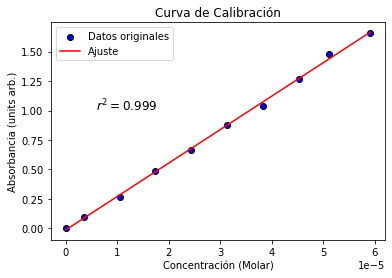

In [43]:
import matplotlib.pyplot as plt

x=Promedio[['Concentración']] 
y=Promedio[['Promedio Absorb']]
y_error =Desviación['Desviación']
fig, ax= plt.subplots()
ax.scatter(x, y, color='blue', label='Datos originales', edgecolors='black')
ax.plot(np.array(x), np.array(y1_pred), color='red', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (Molar)")
ax.set_ylabel("Absorbancia (units arb.)")
ax.text(0.0000059, 1, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
#plt.errorbar(x, y,  yerr=y_error, fmt = '--ro', ms=10, ecolor='g', elinewidth = 3, capsize = 10, capthick = 3)
plt.show()
#fig.savefig("ccal1.pdf",bbox_inches='tight')

<font color='red' size=6>**Ejercicio 2**

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

<font color='red' size=6>**Modelo 1**


In [44]:
aromaticos = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[1,9], nrows=66)
aromaticos

,1,9
0,NaN,NaN
1,DESCRIPCION DE LA MUESTRA,Aromaticos(%w)
2,VASCONIA BLEND,29.15
3,CAÑO LIMON,32.42
4,CARGA U 2000,39.84
...,...,...
61,CRUDO MAGDALENA BLEND K9627GRB,40.93
62,DOROTEA,NaN
63,ARAGUANEY,29.75
64,CAPACHOS,24.78


In [10]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)
espectros

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,0.005132,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,0.005135,0.000016,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,0.005138,0.000017,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,0.005140,0.000017,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [11]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [50]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)  
propiedad_1 = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[9], )
Propiedad_2 = propiedad_1.drop([0,1])
Propiedad_2.columns=['Aromaticos(%w)']
Propiedad_2


,Aromaticos(%w)
2,29.15
3,32.42
4,39.84
5,26
6,26.04
...,...
80,NaN
81,NaN
82,NaN
83,NaN


In [51]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None) 
espectros

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,0.005132,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,0.005135,0.000016,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,0.005138,0.000017,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,0.005140,0.000017,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [52]:
espectros_2 = espectros.transpose()
espectros_2

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,1.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,2.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
80,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [15]:
propiedad_1.dropna(inplace = True)

In [53]:
Tabla= Propiedad_2.join(espectros_2, on=None,  how= 'right')
Tabla

,Aromaticos(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,NaN,1.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,NaN,2.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,29.15,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,32.42,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,39.84,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,NaN,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,NaN,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
80,NaN,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [54]:
Tabla.dropna(inplace = True)
Tabla

,Aromaticos(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,29.15,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,1.274435e-05
3,32.42,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,1.148033e-02
4,39.84,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,3.144747e-03
5,26,6.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,0.007675,0.007688,0.007699,0.007707,7.710565e-03
6,26.04,7.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,0.000036,0.000037,0.000038,0.000037,3.638567e-05
7,34,8.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,0.000014,0.000009,0.000005,0.000002,0.000000e+00
8,30.3,9.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,0.005132,0.005135,0.005138,0.005140,5.141381e-03
9,25.16,10.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,0.000014,0.000016,0.000017,0.000017,1.516786e-05
10,8.13,11.0,0.006624,0.006846,0.006878,0.006786,0.006664,0.006602,0.006648,0.006787,...,0.023228,2.324714e-02,0.023263,0.023274,0.023281,0.023283,0.023283,0.023282,0.023282,2.328219e-02
11,32.9,12.0,0.012977,0.012802,0.012407,0.011908,0.011426,0.011040,0.010778,0.010613,...,0.006645,6.643886e-03,0.006644,0.006646,0.006649,0.006652,0.006653,0.006653,0.006653,6.651965e-03


In [55]:
prop=Tabla['Aromaticos(%w)']
prop

2     29.15
3     32.42
4     39.84
5        26
6     26.04
7        34
8      30.3
9     25.16
10     8.13
11     32.9
12    28.54
13    25.74
14    28.97
15     8.13
16     9.29
17    27.62
18    31.36
19      8.3
20    29.78
21    30.41
22    29.01
23    29.18
24     28.1
25     28.1
26     36.9
28    30.78
29     15.8
30    35.66
31    28.57
32     22.7
33    29.65
34     30.8
35     31.5
36     29.5
37      9.4
39     26.3
40    28.18
41     36.9
42    33.45
43    41.42
44    41.16
47    34.52
48    45.31
49    50.76
50    43.37
51    48.54
52    37.35
53    37.83
54    35.39
55     50.5
56    37.98
58    34.58
59    39.01
60    18.66
61    40.93
63    29.75
64    24.78
65    28.16
66    41.72
68    45.53
Name: Aromaticos(%w), dtype: object

In [56]:
Tabla.drop(['Aromaticos(%w)'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,1.274435e-05
3,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,1.148033e-02
4,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,3.144747e-03
5,6.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,0.007311,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,0.007675,0.007688,0.007699,0.007707,7.710565e-03
6,7.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,0.014046,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,0.000036,0.000037,0.000038,0.000037,3.638567e-05
7,8.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,0.029793,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,0.000014,0.000009,0.000005,0.000002,0.000000e+00
8,9.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,0.009744,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,0.005132,0.005135,0.005138,0.005140,5.141381e-03
9,10.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,0.016107,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,0.000014,0.000016,0.000017,0.000017,1.516786e-05
10,11.0,0.006624,0.006846,0.006878,0.006786,0.006664,0.006602,0.006648,0.006787,0.006954,...,0.023228,2.324714e-02,0.023263,0.023274,0.023281,0.023283,0.023283,0.023282,0.023282,2.328219e-02
11,12.0,0.012977,0.012802,0.012407,0.011908,0.011426,0.011040,0.010778,0.010613,0.010499,...,0.006645,6.643886e-03,0.006644,0.006646,0.006649,0.006652,0.006653,0.006653,0.006653,6.651965e-03


In [59]:
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(Tabla) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Tabla)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(Tabla, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

C:\Users\PERSONAL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PERSONAL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


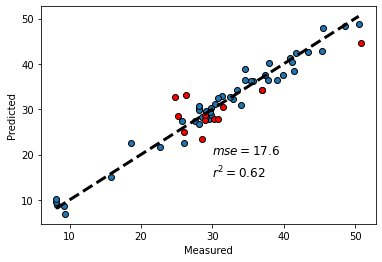

MSE = 17.6


In [60]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, prop, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,20, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(30,15, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

<font color='red' size=6>**Modelo 2**

In [84]:
resinas = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[1,10], nrows=66)
resinas

,1,10
0,NaN,NaN
1,DESCRIPCION DE LA MUESTRA,Resinas(%w)
2,VASCONIA BLEND,11.2
3,CAÑO LIMON,11.68
4,CARGA U 2000,17.86
...,...,...
61,CRUDO MAGDALENA BLEND K9627GRB,18.91
62,DOROTEA,NaN
63,ARAGUANEY,5.8
64,CAPACHOS,NaN


In [85]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)
espectros

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,0.005132,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,0.005135,0.000016,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,0.005138,0.000017,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,0.005140,0.000017,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [86]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)  
propiedad_1 = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[10], )
Propiedad_2 = propiedad_1.drop([0,1])
Propiedad_2.columns=['resinas(%w)']
Propiedad_2


,resinas(%w)
2,11.2
3,11.68
4,17.86
5,16.8
6,9.97
...,...
80,NaN
81,NaN
82,NaN
83,NaN


In [87]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None) 
espectros

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,0.005132,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,0.005135,0.000016,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,0.005138,0.000017,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,0.005140,0.000017,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [88]:
espectros_2 = espectros.transpose()
espectros_2

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,1.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,2.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
80,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [89]:
Tabla= Propiedad_2.join(espectros_2, on=None,  how= 'right')
Tabla

,resinas(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,NaN,1.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,NaN,2.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,11.2,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,11.68,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,17.86,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,NaN,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,NaN,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
80,NaN,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [90]:
Tabla.dropna(inplace = True)
Tabla

,resinas(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,11.2,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,1.274435e-05
3,11.68,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,1.148033e-02
4,17.86,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,3.144747e-03
5,16.8,6.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,0.007675,0.007688,0.007699,0.007707,7.710565e-03
6,9.97,7.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,0.000036,0.000037,0.000038,0.000037,3.638567e-05
7,10.4,8.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,0.000014,0.000009,0.000005,0.000002,0.000000e+00
8,10.2,9.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,0.005132,0.005135,0.005138,0.005140,5.141381e-03
9,15.69,10.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,0.000014,0.000016,0.000017,0.000017,1.516786e-05
10,2.24,11.0,0.006624,0.006846,0.006878,0.006786,0.006664,0.006602,0.006648,0.006787,...,0.023228,2.324714e-02,0.023263,0.023274,0.023281,0.023283,0.023283,0.023282,0.023282,2.328219e-02
11,11.41,12.0,0.012977,0.012802,0.012407,0.011908,0.011426,0.011040,0.010778,0.010613,...,0.006645,6.643886e-03,0.006644,0.006646,0.006649,0.006652,0.006653,0.006653,0.006653,6.651965e-03


In [91]:
prop=Tabla['resinas(%w)']
prop

2      11.2
3     11.68
4     17.86
5      16.8
6      9.97
7      10.4
8      10.2
9     15.69
10     2.24
11    11.41
12    12.21
13    11.57
14    11.04
15     2.24
16     2.16
17    11.55
18    15.33
19        2
20    13.22
21    16.34
22    11.54
23    12.33
24    13.08
25      6.4
26     15.3
28    14.14
29      8.3
30    13.44
31    11.53
32      9.3
33    13.71
34     13.6
35      9.9
36     10.4
37      2.9
39      8.5
40     7.59
41     14.2
42    27.11
43    20.53
44    14.49
47     8.15
48       24
49    19.06
50     19.1
51     25.9
52     7.52
53    15.45
54     5.82
55    18.08
56     8.68
58    10.25
59      4.6
60      3.7
61    18.91
63      5.8
65     2.72
66     6.83
68      8.7
Name: resinas(%w), dtype: object

In [92]:
Tabla.drop(['resinas(%w)'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,3.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,1.274435e-05
3,4.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,1.148033e-02
4,5.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,3.144747e-03
5,6.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,0.007311,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,0.007675,0.007688,0.007699,0.007707,7.710565e-03
6,7.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,0.014046,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,0.000036,0.000037,0.000038,0.000037,3.638567e-05
7,8.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,0.029793,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,0.000014,0.000009,0.000005,0.000002,0.000000e+00
8,9.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,0.009744,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,0.005132,0.005135,0.005138,0.005140,5.141381e-03
9,10.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,0.016107,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,0.000014,0.000016,0.000017,0.000017,1.516786e-05
10,11.0,0.006624,0.006846,0.006878,0.006786,0.006664,0.006602,0.006648,0.006787,0.006954,...,0.023228,2.324714e-02,0.023263,0.023274,0.023281,0.023283,0.023283,0.023282,0.023282,2.328219e-02
11,12.0,0.012977,0.012802,0.012407,0.011908,0.011426,0.011040,0.010778,0.010613,0.010499,...,0.006645,6.643886e-03,0.006644,0.006646,0.006649,0.006652,0.006653,0.006653,0.006653,6.651965e-03


In [93]:
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(Tabla) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Tabla)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(Tabla, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

C:\Users\PERSONAL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PERSONAL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


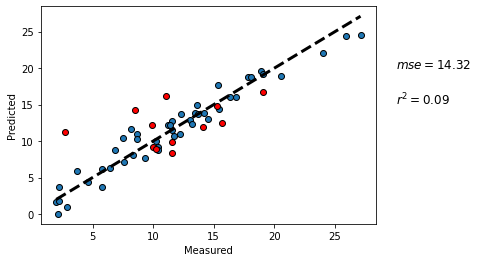

MSE = 14.32


In [94]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, prop, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,20, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(30,15, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))